<a href="https://colab.research.google.com/github/yulianthyho/DataCamp-Data-Analyst-Associate-Certificate/blob/main/Food_Claims.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# DataCamp Data Analyst Associate Certificate
**Case Study Project - Food Claims**

by Yulianthy Ho

**Company Background**

Vivendo is a fast food chain in Brazil with over 200 outlets. As with many fast food establishments, customers make claims against the company. For example, they blame Vivendo for suspected food poisoning.
The legal team, who processes these claims, is currently split across four locations. The new head of the legal department wants to see if there are differences in the time it takes to close claims across the locations.

**Customer Question**

The legal team has given you a data set where each row is a claim made against the company. They would like you to answer the following questions:

● How does the number of claims differ across locations?

● What is the distribution of time to close claims?

● How does the average time to close claims differ by location?

# Import Library

In [ ]:
# import library
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
from datetime import timedelta


# Load The Dataset

In [ ]:
url_1 = 'https://docs.google.com/spreadsheets/d/12I8RsnITvL7vsOE10fXbBzr8IvK4NZQi/edit#gid=447849532'
url_sheet_trf_1 = url_1.replace('/edit#gid=', '/export?format=xlsx&gid=')

# load the dataset
df = pd.read_excel(url_sheet_trf_1)
pd.set_option('display.max.columns',None)
# get the overview of the dataset
df.head()

,Claim ID,Time to Close,Claim Amount,Amount Paid,Location,Individuals on Claim,Linked Cases,Cause
0,0000000-00.2010.0.00.0094,2082.0,"R$50,000.00",34297.47,RECIFE,2.0,False,NaN
1,0000000-00.2011.0.00.0086,3591.0,"R$180,000.00",56383.54,SAO LUIS,7.0,False,NaN
2,0000000-00.2012.0.00.0092,2997.0,"R$70,000.00",12366.76,SAO LUIS,3.0,False,vegetables
3,0000000-00.2013.0.00.0096,1143.0,"R$95,104.00",29217.16,FORTALEZA,4.0,False,NaN
4,0000000-00.2014.0.00.0097,117.0,"R$29,000.00",12610.50,FORTALEZA,1.0,False,meat


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 98 entries, 0 to 97
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Claim ID              98 non-null     object 
 1   Time to Close         98 non-null     float64
 2   Claim Amount          98 non-null     object 
 3   Amount Paid           98 non-null     float64
 4   Location              98 non-null     object 
 5   Individuals on Claim  98 non-null     float64
 6   Linked Cases          98 non-null     bool   
 7   Cause                 20 non-null     object 
dtypes: bool(1), float64(3), object(4)
memory usage: 5.6+ KB


# Data Cleaning

In [ ]:
#change the data type
df['Time to Close'] = df['Time to Close'].astype(int)
df['Individuals on Claim'] = df['Individuals on Claim'].astype(int)

In [ ]:
#change claim amount to int, remove "the R$ and ," in the columns
df['Claim Amount'] = df['Claim Amount'].str.strip('R$')
df['Claim Amount'] = pd.to_numeric(df['Claim Amount'].str.replace(',', ''))

In [ ]:
#fill the NaN in causes with unknown
df['Cause'].fillna('unknown', inplace=True)

In [ ]:
#check unique location
df['Location'].value_counts()

SAO LUIS     30
RECIFE       25
FORTALEZA    22
NATAL        21
Name: Location, dtype: int64

In [ ]:
#checking the missing value
df.isna().sum()

Claim ID                0
Time to Close           0
Claim Amount            0
Amount Paid             0
Location                0
Individuals on Claim    0
Linked Cases            0
Cause                   0
dtype: int64

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 98 entries, 0 to 97
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Claim ID              98 non-null     object 
 1   Time to Close         98 non-null     int64  
 2   Claim Amount          98 non-null     float64
 3   Amount Paid           98 non-null     float64
 4   Location              98 non-null     object 
 5   Individuals on Claim  98 non-null     int64  
 6   Linked Cases          98 non-null     bool   
 7   Cause                 98 non-null     object 
dtypes: bool(1), float64(2), int64(2), object(3)
memory usage: 5.6+ KB


In [ ]:
df.head()

,Claim ID,Time to Close,Claim Amount,Amount Paid,Location,Individuals on Claim,Linked Cases,Cause
0,0000000-00.2010.0.00.0094,2082,50000.0,34297.47,RECIFE,2,False,unknown
1,0000000-00.2011.0.00.0086,3591,180000.0,56383.54,SAO LUIS,7,False,unknown
2,0000000-00.2012.0.00.0092,2997,70000.0,12366.76,SAO LUIS,3,False,vegetables
3,0000000-00.2013.0.00.0096,1143,95104.0,29217.16,FORTALEZA,4,False,unknown
4,0000000-00.2014.0.00.0097,117,29000.0,12610.50,FORTALEZA,1,False,meat


# Exploratory Data Analysis (EDA) - Data Discovery and Visualization

In [ ]:
df.describe()

,Time to Close,Claim Amount,Amount Paid,Individuals on Claim
count,98.000000,98.000000,98.000000,98.000000
mean,833.510204,122952.030612,58448.238571,4.908163
std,685.424441,166433.389040,87525.873849,7.292259
min,29.000000,3555.000000,999.680000,0.000000
25%,340.750000,40000.000000,15965.642500,1.000000
50%,638.500000,58454.500000,29451.040000,2.000000
75%,1138.750000,136573.250000,52114.760000,5.750000
max,3591.000000,936540.000000,558725.770000,41.000000


## How does the number of claims differ across locations?

In [ ]:
df.groupby('Location')['Claim ID'].count()

Location
FORTALEZA    22
NATAL        21
RECIFE       25
SAO LUIS     30
Name: Claim ID, dtype: int64

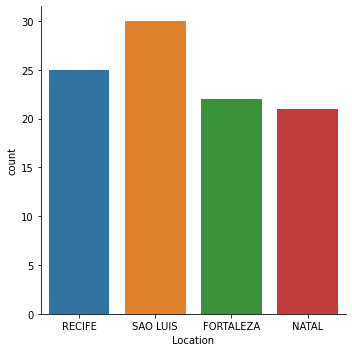

In [ ]:
#Number of claims differ across locations
sns.catplot(x = 'Location', data = df, kind = 'count')
plt.show()

Insight : From the chart above, we can see that Sao Luis has the most number of claims with 30 claims, while Natal has the lowest of number of claims with 21 claims.

## What is the distribution of time to close claims?

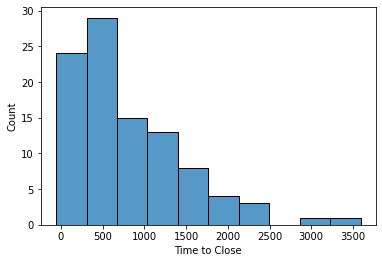

In [ ]:
#distribution of time to close claims
sns.histplot(df, x= 'Time to Close', bins = 10)
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


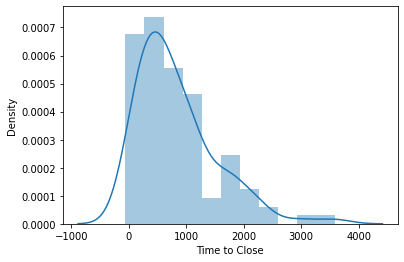

In [ ]:
sns.distplot(df['Time to Close'])
plt.show()

Insight : 
- From the histogram above we can see that most distributions of time to close claims belongs in the range 250-750 days, with median 638 days. 
- The minimum time to close the claims is 29 days
- The maximum time to close the claims is 3591 days

## How does the average time to close claims differ by location?

In [ ]:
df.groupby('Location')['Time to Close'].mean()

Location
FORTALEZA     775.500000
NATAL         581.142857
RECIFE        860.680000
SAO LUIS     1026.266667
Name: Time to Close, dtype: float64

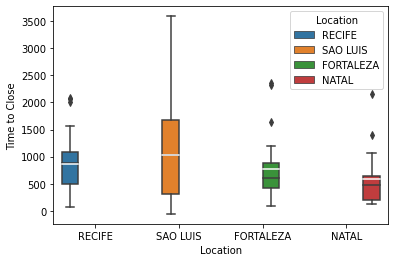

In [ ]:
#The average time to close claims differ by location
meanlineprops = dict(linestyle='-', linewidth=1.5, color='white')
sns.boxplot(x = 'Location', y = 'Time to Close', data = df, hue = 'Location', showmeans = True, meanline = True, meanprops = meanlineprops)
plt.show()

Insight : Comparing the four locations, SAO LUIS processed the most time to close claims on average and NATAL has the fewest time.

## Pearson Correlation

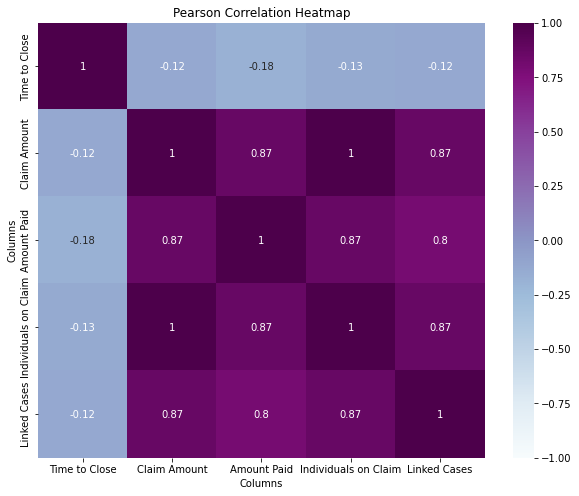

In [ ]:
#correlation between all the variable
corrPearson = df.corr(method = "pearson")
figure = plt.figure(figsize = (10, 8))
sns.heatmap(corrPearson, annot = True, cmap = "BuPu", vmin = -1, vmax = +1)
plt.title("Pearson Correlation Heatmap")
plt.xlabel("Columns")
plt.ylabel("Columns")
plt.show()

From Pearson Correlation:
- Time to close has weak correlations amongs all variable ; Claim Amount, Amount Paid, and Individual on Claim
- Claim Amount and Amount Paid have strong correlation with Individuals on Claim.

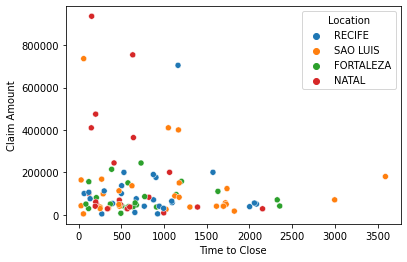

In [ ]:
#Check the relationship between claim amount, time to close claims differ from every location
sns.scatterplot(data = df, x = 'Time to Close', y = 'Claim Amount', hue = 'Location')
plt.show()

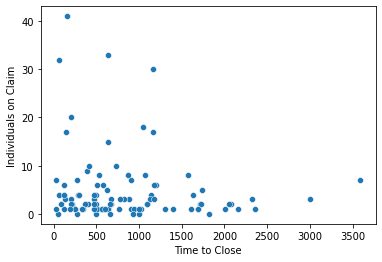

In [ ]:
#Check the relationship between claim amount, and individual on claims differ from every location
sns.scatterplot(data = df, x = 'Time to Close', y = 'Individuals on Claim')
plt.show()

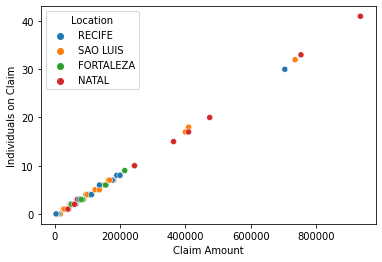

In [ ]:
#Check the relationship between claim amount, and individual on claims differ from every location
sns.scatterplot(data = df, x = 'Claim Amount', y = 'Individuals on Claim', hue = 'Location')
plt.show()

In [ ]:
#check total of individuals on claim on different location
df.groupby('Location')['Individuals on Claim'].sum()

Location
FORTALEZA     69
NATAL        168
RECIFE       106
SAO LUIS     138
Name: Individuals on Claim, dtype: int64

In [ ]:
#check total of claim amount and amount paid on different location
df.groupby('Location')['Claim Amount','Amount Paid'].sum()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  """Entry point for launching an IPython kernel.


,Claim Amount,Amount Paid
Location,,
FORTALEZA,1825506.0,871041.62
NATAL,4045193.0,1858284.22
RECIFE,2688374.0,1159152.70
SAO LUIS,3490226.0,1839448.84


Insight :
- Natal has the most indivuals on claims with 168 people, while Fortaleza has the lowest individual on claims with 69 people.
- Furthermore,due to the large number of people claiming, the amount to be paid also increases. Natal has the most claim amount with R$ 4.045.193

# Insight and Recommendation

**Insight :**
- Sao Luis has the most number of claims with 30 claims, while Natal has the lowest of number of claims with 21 claims.
- The most distributions of time to close claims belongs in the range 250-750 days, with median 638 days. 
- The minimum time to close the claims is 29 days and the maximum time to close the claims is 3591 days
- Comparing the four locations, SAO LUIS processed the most time to close claims on average and NATAL has the fewest time.
- Natal has the most indivuals on claims with 168 people, while Fortaleza has the lowest individual on claims with 69 people.Furthermore,due to the large number of people claiming, the amount to be paid also increases. Natal has the most claim amount with R$ 4.045.193

**Recommendation:**

The legal team can conduct checks at various locations regarding the people who reported this incident. The priority locations to be checked are :
- Sao Luis : Need to check out this location because it processed the most time to close the claims among other locations.
- Natal : Although Natal has the fewest time to processed the claims, but the number of individual who claims this incident is the largest among other location. Natal also has the most claim amount and amount paid among other locations.
